## Task
Figure out rules for generation samples of 16 english letters (possibly repetitive) which could be used to produce _reasonable_ number of words (of different length) from the top 40k (supposed to be estimated size of vocabulary of native speakers with higher education) most frequently used words.

## Data source
https://gist.github.com/h3xx/1976236

"Wictionary top 100,000 most frequently-used English words"

This file is filtered from the comments, words consisting of less than 3 and more than 16 letters, words containing anything beside regular Enghlish letters (a-z), duplications, words consisting of the same letter and translated to all lower case with the following command:
```
grep -vE "^#" wiki-100k.txt | tr '[:upper:]' '[:lower:]' | sort | uniq | grep -E "^[a-z]{3,16}$" | grep -vE "[^a-z]" | grep -vE "^([a-z])\1+$" > filtered-words
```

## Max number of repetitions
Let's begin with finding out the maximum number of repetitions for each letter. First of all calculate the number of letter occurrence in every word, and print the statistics of the result

In [1]:
from pandas import DataFrame as df
from pandas import Series
from pandas import read_csv
vowels = 'aeiouy'
consonants = 'bcdfghjklmnpqrstvwxz'

applicable_words = read_csv('filtered-words', keep_default_na = False, names = ['words', ])
applicable_words['len'] = applicable_words.apply(lambda row: len(row['words']), axis = 1)
for letter in vowels + consonants:
    applicable_words[letter] = applicable_words.apply(lambda row: row['words'].count(letter), axis = 1)

In [2]:
applicable_words.describe()

,len,a,e,i,o,u,y,b,c,d,...,n,p,q,r,s,t,v,w,x,z
count,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,...,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000
mean,7.303432,0.597493,0.921488,0.587195,0.429659,0.273498,0.101091,0.134798,0.272203,0.280549,...,0.562650,0.185231,0.016326,0.538441,0.550529,0.484489,0.094742,0.065368,0.019556,0.024625
std,2.307272,0.697471,0.839261,0.709280,0.621132,0.497175,0.306814,0.364697,0.507634,0.514540,...,0.693412,0.438892,0.128482,0.640935,0.715630,0.652254,0.299982,0.252995,0.143906,0.163026
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,6.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000,2.000000,2.000000,4.000000,2.000000


Some letters have rather unexpected max number of occurrences, e.g. ```a``` occurs 6 times in some of the words. Taking a closer look at the result reveals one subtle issue:

In [3]:
applicable_words.loc[applicable_words['a'] > 3]

,words,len,a,e,i,o,u,y,b,c,...,n,p,q,r,s,t,v,w,x,z
7,aangenaam,9,4,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1147,ainakaan,8,4,0,1,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1153,ainoastaan,10,4,0,1,1,0,0,0,0,...,2,0,0,0,1,1,0,0,0,0
1215,alabama,7,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1417,allahabad,9,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1690,amalgamate,10,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1691,amalgamated,11,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1692,amalgamation,12,4,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1917,anastasia,9,4,0,1,0,0,0,0,0,...,1,0,0,0,2,1,0,0,0,0
1928,anaxagoras,10,4,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0


### Account for the outliers
Unfortunately some of the words in the dictionary appear to be proper names, which may have rather unusual distribution of letters. So the goal of this step is to filter out those outliers, and get the maximum allowed limit for each letter. As a simple measure let's estimate it by the 99-th percentile.

In [4]:
max_limits = {}
for letter in vowels + consonants:
    max_limits[letter] = applicable_words.loc[applicable_words[letter] > 0, [letter]].quantile(0.99)[letter]
print(max_limits)

{'a': 3.0, 'e': 3.0, 'i': 3.0, 'o': 3.0, 'u': 2.0, 'y': 2.0, 'b': 2.0, 'c': 2.0, 'd': 2.0, 'f': 2.0, 'g': 2.0, 'h': 2.0, 'j': 1.0, 'k': 2.0, 'l': 3.0, 'm': 2.0, 'n': 3.0, 'p': 2.0, 'q': 2.0, 'r': 2.0, 's': 3.0, 't': 3.0, 'v': 2.0, 'w': 2.0, 'x': 2.0, 'z': 2.0}


## Frequency distribution of letters
We can calculate frequency of occurrence of every letter in each words. These frequencies can be used to build a simple sample generation out of the standard uniform distribution sample. The latter is defined on an interval $[0.0, 1.0]$, so we can split that interval into 26 sub-intervals with widths proprotional to the frequency of every letter. Mapping values generated within each interval onto the alphabet then yields the sample of letters with the same frequency as our dictionary. Let's take a closer look at how this works.

Text(0.5, 1.0, '16 letters')

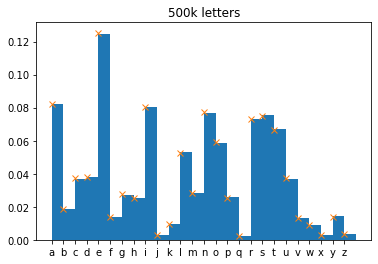

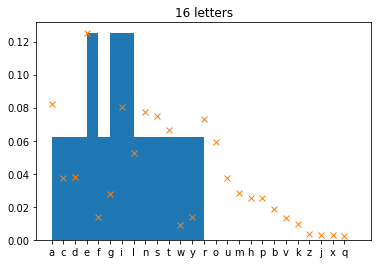

In [5]:
import numpy as np
import bisect
from pandas import Index
import pylab as plt

words = applicable_words
for key, limit in max_limits.items():
    words = words.loc[words[key] <= limit]

stats = words.loc[:,vowels[0]:consonants[-1]].describe()
stats = stats.T.sort_values(by = 'mean', ascending = False).T
stats = stats.T['mean'] / stats.T['mean'].sum()

intervals = stats.copy()

for i in range(1, len(intervals)):
    intervals[i] += intervals[i - 1]

generate_letters = lambda size: list([intervals.index[i] for i in np.searchsorted(intervals, np.random.uniform(size = size))])

sample500k = sorted(generate_letters(500000))
sample16 = sorted(generate_letters(16))

plt.figure("500k letters")
plt.hist(sample500k, bins = range(27), density = True)
plt.plot(stats.index, stats, 'x')
plt.title("500k letters")

plt.figure("16 letters")
plt.hist(sample16, bins = range(27), density = True)
plt.plot(stats.index, stats, 'x')
plt.title("16 letters")


## Vowel/consonant ratio
If you'll run the previous cell several times and observe the set of generated lettters after each run, you'll see that half+ of the sample are vowels. Let's try checking what the ratio would be for the set of words we have.

In [6]:
import re

for letter_set in [vowels, consonants]:
    pattern = re.compile('[{0}]'.format(letter_set))
    applicable_words[letter_set] = applicable_words.apply(lambda row: len(pattern.findall(row['words'])), axis = 1)

In [7]:
print(applicable_words.loc[:,vowels:consonants].describe())
print(applicable_words.loc[applicable_words['len'] >= 10].loc[applicable_words[vowels] >= 6, 'words':vowels[-1]])
# stats16 = applicable_words.loc[applicable_words['len'] == 16].describe().loc[:,vowels[0]:consonants[-1]]
# print(stats16.T['mean'])
stats16 = applicable_words.loc[applicable_words['len'] >= 14].describe().loc[:,vowels:consonants]
print(stats16)

             aeiouy  bcdfghjklmnpqrstvwxz
count  62538.000000          62538.000000
mean       2.910422              4.393009
std        1.139025              1.557592
min        0.000000              0.000000
25%        2.000000              3.000000
50%        3.000000              4.000000
75%        4.000000              5.000000
max        8.000000             11.000000
                words  len  a  e  i  o  u  y
58       abbreviation   12  2  1  2  1  0  0
59      abbreviations   13  2  1  2  1  0  0
139      abolitionist   12  1  0  3  2  0  0
140     abolitionists   13  1  0  3  2  0  0
144       abomination   11  2  0  2  2  0  0
...               ...  ... .. .. .. .. .. ..
60058  voluptuousness   14  0  1  0  2  3  0
60092     voraciously   11  1  0  1  2  1  1
60390     wainamoinen   11  2  1  2  1  0  0
62222      yugoslavia   10  2  0  1  1  1  1
62471   zufriedenheit   13  0  3  2  0  1  0

[1304 rows x 8 columns]
           aeiouy  bcdfghjklmnpqrstvwxz
count  527.000000

It seems interesting to use statistics of long words as a base for reasonable limits on vowels/consonants ratio. The rationale is that there can be only one 16-letter word on the field (the proof is that there are only 8 letters with frequency greater than one among 16-letter words), and it would definitely be cool to come up with it given such a chance. After playing around with this data for some time I decided to just limit the maximal number of vowels to 8, and minimal number of vowels to 3. So the algorithm would be to ~generate 3 vowels based on the statistics of long words (14+ letters), and then~ generate ~the rest~ 13 letters using the full statistics for the full set of letters, and if there are still less than 3 vowels, generate 3 more vowels using the statistics for the long words. Individual limits for the specific letters should still be controlled, so when some letter hits its limit the idea is to pop it out of the set of letters and redistribute all remaining letters evenly.

## Unique letters
Now let's take a look at the distribution of unique letters

,len,a,e,i,o,u,y,b,c,d,...,r,s,t,v,w,x,z,aeiouy,bcdfghjklmnpqrstvwxz,len_uniq
count,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,...,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000
mean,4.486049,0.444374,0.634833,0.281998,0.282538,0.167057,0.071377,0.097930,0.105851,0.170207,...,0.273267,0.346715,0.262466,0.062916,0.060936,0.020702,0.027723,1.882178,2.603870,3.686409
std,1.055373,0.695854,0.835649,0.527189,0.555183,0.411591,0.265385,0.338042,0.342022,0.442086,...,0.535562,0.638466,0.551485,0.252990,0.242587,0.168988,0.173255,0.741670,0.850285,0.509116
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000
75%,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000
max,11.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,5.000000,3.000000,2.000000,2.000000,4.000000,2.000000,5.000000,7.000000,4.000000


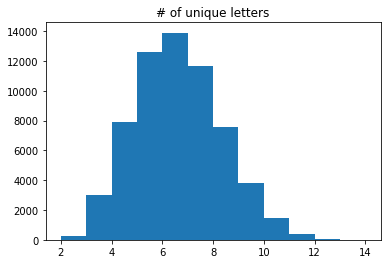

In [8]:
applicable_words['len_uniq'] = applicable_words.apply(lambda row: len({*row['words']}), axis = 1)
words_with_repetitive_letters = applicable_words #.loc[applicable_words['len_uniq'] != applicable_words['len']]
plt.figure("# of unique letters")
plt.hist(words_with_repetitive_letters['len_uniq'], bins = range(2,15))
plt.title("# of unique letters")
words_with_repetitive_letters.loc[words_with_repetitive_letters['len_uniq'] < 5].describe()

It looks like 6 is a reasonable minimal limit for the number of unique letters: words with lesser number of unique letters and greater lengths are mostly "mistakes" in the dict (like german or french words). There's probably no need to handle this in any special manner, since limits on the maximum number of letter repetitions should already provide for this limit to be almost surely met.

## Statistics of vowels in longer words
Now let's find similarly basic function for statistics of vowels in longer words.

i    0.280220
e    0.260504
a    0.174855
o    0.162250
u    0.086296
y    0.035876
Name: mean, dtype: float64


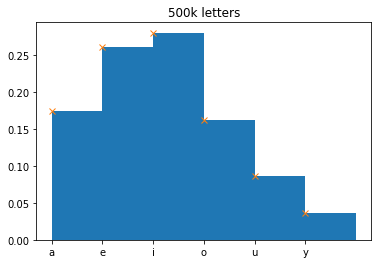

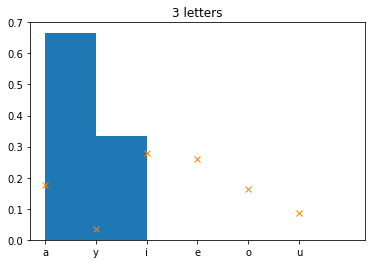

In [11]:
stats_vowels = applicable_words.loc[applicable_words['len'] > 13, vowels[0]:vowels[-1]].describe()
stats_vowels = stats_vowels.T.sort_values(by = 'mean', ascending = False).T
stats_vowels = stats_vowels.T['mean'] / stats_vowels.T['mean'].sum()

intervals_vowels = stats_vowels.copy()

for i in range(1, len(intervals_vowels)):
    intervals_vowels[i] += intervals_vowels[i - 1]

generate_vowels = lambda size: list([intervals_vowels.index[i] for i in np.searchsorted(intervals_vowels, np.random.uniform(size = size))])

sample500k = sorted(generate_vowels(500000))
sample16 = sorted(generate_vowels(3))

plt.figure("500k letters")
plt.hist(sample500k, bins = range(len(vowels) + 1), density = True)
plt.plot(stats_vowels.index, stats_vowels, 'x')
plt.title("500k letters")

plt.figure("3 letters")
plt.hist(sample16, bins = range(len(vowels) + 1), density = True)
plt.plot(stats_vowels.index, stats_vowels, 'x')
plt.title("3 letters")

print(stats_vowels)

## Implementation
Finally we can get to the actual implementation of the algorithm.

In [19]:
import pandas as pd
from functools import reduce

print(max_limits)

cornell = {
    'e' : 12.02,
    't' : 9.10,
    'a' : 8.12,
    'o' : 7.68,
    'i' : 7.31,
    'n' : 6.95,
    's' : 6.28,
    'r' : 6.02,
    'h' : 5.92,
    'd' : 4.32,
    'l' : 3.98,
    'u' : 2.88,
    'c' : 2.71,
    'm' : 2.61,
    'f' : 2.30,
    'y' : 2.11,
    'w' : 2.09,
    'g' : 2.03,
    'p' : 1.82,
    'b' : 1.49,
    'v' : 1.11,
    'k' : 0.69,
    'x' : 0.17,
    'q' : 0.11,
    'j' : 0.10,
    'z' : 0.07
}

cornell_stats = pd.Series(cornell)

def get_intervals(statistics):
    ret = statistics / statistics.sum()
    for i in range(1, len(ret)):
        ret[i] += ret[i-1]
    return ret

class FieldGenerator:
    def __init__(self):
        self.limits = {**max_limits}
        self.stats_common = cornell_stats.copy()
        self.stats_vowels = stats_vowels.copy()

        self.field = None
        self.freq_map = np.zeros(26, dtype = int)
    
    def get_field(self):
        if self.field is None:
            self._generate()

        return self.field
    
    def _generate(self):
        self.field = []
        sample = np.random.uniform(size = 16)
        stts = self.stats_common
        intervals_ = get_intervals(stts)
        for i in range(len(sample)):
            letter = intervals_.index[np.searchsorted(intervals_, sample[i])]
            self.freq_map[ord(letter) - ord('a')] += 1
            freq = self.freq_map[ord(letter) - ord('a')]
            if (freq == max_limits[letter]):
                stts = stts.drop(labels = (letter))
                if letter in self.stats_vowels.index and not stts is self.stats_vowels:
                    self.stats_vowels = self.stats_vowels.drop(labels = (letter))
                intervals_ = get_intervals(stts)
                print("Dropping letter {0}".format(letter))
            if (i >= len(sample) - 4) and not stts is self.stats_vowels:
                total_vowels = 0
                for vowel in vowels:
                    total_vowels += self.freq_map[ord(vowel) - ord('a')]
                if total_vowels < 3:
                    stts = self.stats_vowels
                    intervals_ = get_intervals(stts)
            print("Generated value {0}, letter {1}, freq map {2}".format(sample[i], letter, self.freq_map))
            self.field.append(letter)

field = FieldGenerator()
print(sorted(field.get_field()))

print("Unique letters: {0}, vowels: {1}, consonants: {2}".format(len(set(field.get_field())),
                                                                reduce(lambda res, char: res + vowels.count(char), field.get_field(), 0),
                                                                reduce(lambda res, char: res + consonants.count(char), field.get_field(), 0)))

solution = applicable_words
for code, freq in enumerate(field.freq_map):
    letter = chr(code + ord('a'))
    solution = solution.loc[solution[letter] <= freq]
print(solution.describe())
print(solution)

{'a': 3.0, 'e': 3.0, 'i': 3.0, 'o': 3.0, 'u': 2.0, 'y': 2.0, 'b': 2.0, 'c': 2.0, 'd': 2.0, 'f': 2.0, 'g': 2.0, 'h': 2.0, 'j': 1.0, 'k': 2.0, 'l': 3.0, 'm': 2.0, 'n': 3.0, 'p': 2.0, 'q': 2.0, 'r': 2.0, 's': 3.0, 't': 3.0, 'v': 2.0, 'w': 2.0, 'x': 2.0, 'z': 2.0}
Generated value 0.8294650542491373, letter c, freq map [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Generated value 0.3791387199761148, letter i, freq map [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Generated value 0.49576180738390896, letter n, freq map [0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Generated value 0.08159792052257542, letter e, freq map [0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Generated value 0.908152929623092, letter w, freq map [0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
Generated value 0.5940432975218981, letter r, freq map [0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0]
Generated value 0.20809600294408803, letter t, freq map [0 0 1 0 1 0 0 0 1 0 0 0 0 1